##### For the classification part of this project, we will be classifying clients who will/will not subscribe to the term deposit in a Portugese bank. Following information will give you an overview of the dataset.

Dataset source: bank-additional.csv from https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

# Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Attribute Information:**

Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

**Output variable (desired target):**
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

The data contains 4119 instances and 21 features.

### We will be using various machine learning techniques like classification models, ensemble learning, PCA and neural networks to determine the outcome of the marketing campaign.

## Import libraries

In [1]:
#Import libraries
import numpy as np
import pandas as pd
from imblearn.over_sampling import ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Data exploration

In [2]:
bank = pd.read_csv('bank-additional.csv', sep=';')

In [3]:
bank.drop(['duration', 'campaign', 'month', 'contact', 'day_of_week'], axis=1, inplace=True)

The above variables are related to the current campaign and can falsely influence our predictions. We do not have access to this information at the start of the new campaign, so it will not be realistic to include these variables in our prediction models.

In [4]:
bank.head()

,age,job,marital,education,default,housing,loan,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   pdays           4119 non-null   int64  
 8   previous        4119 non-null   int64  
 9   poutcome        4119 non-null   object 
 10  emp.var.rate    4119 non-null   float64
 11  cons.price.idx  4119 non-null   float64
 12  cons.conf.idx   4119 non-null   float64
 13  euribor3m       4119 non-null   float64
 14  nr.employed     4119 non-null   float64
 15  y               4119 non-null   object 
dtypes: float64(5), int64(3), object(8)
memory usage: 515.0+ KB


In [6]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

 We can see there are 'unknown' and 'nonexistent' cell values for some features which can be treated as missing values to get better insight. We will figure out what to do with these missing values from our data exploration.

In [7]:
bank.replace(['unknown','nonexistent'], np.nan, inplace=True)

In [8]:
bank.loc[:, bank.isnull().any()].columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [9]:
bank.isnull().sum().sum() / (4119*16)

0.0721200534110221

7.212% of the dataset contains null values which fulfils our requirement for missing values. Now, we'll explore the data for categorical columns and numerical columns.

<AxesSubplot:title={'center':'Job Type Counts'}>

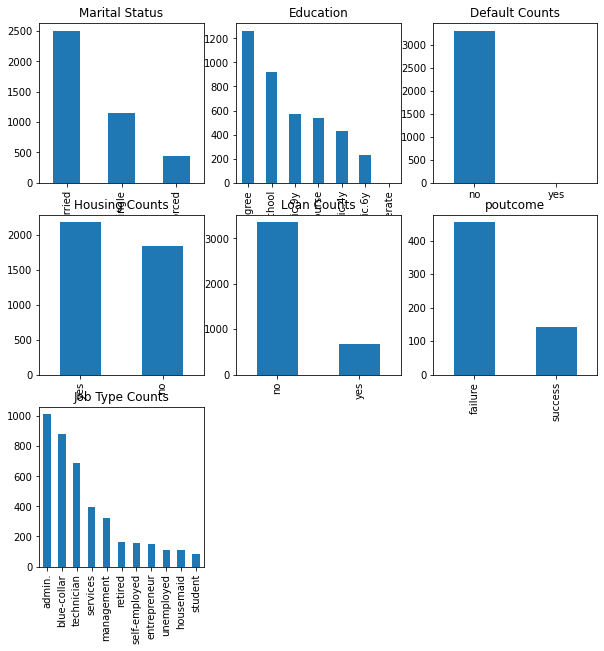

In [10]:
#Distribution of categorical features
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 3)

# Plot Marital status
plt.subplot2grid(fig_dims, (0, 0))
bank['marital'].value_counts().plot(kind='bar', 
                                         title='Marital Status')

# Plot Education counts
plt.subplot2grid(fig_dims, (0, 1))
bank['education'].value_counts().plot(kind='bar', 
                                       title='Education')

# Plot Default counts
plt.subplot2grid(fig_dims, (0, 2))
bank['default'].value_counts().plot(kind='bar', 
                                    title='Default Counts')
plt.xticks(rotation=0)

# Plot Housing counts
plt.subplot2grid(fig_dims, (1, 0))
bank['housing'].value_counts().plot(kind='bar', 
                                         title='Housing Counts')

# Plot Loan counts
plt.subplot2grid(fig_dims, (1, 1))
bank['loan'].value_counts().plot(kind='bar', 
                                         title='Loan Counts')

# Plot poutcome counts
plt.subplot2grid(fig_dims, (1, 2))
bank['poutcome'].value_counts().plot(kind='bar', 
                                         title='poutcome')
# Plot Job counts
plt.subplot2grid(fig_dims, (2, 0))
bank['job'].value_counts().plot(kind='bar', 
                                         title='Job Type Counts')


Looking at the amount of missing values for job, education, marital, poutcome, housing, loan, default

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
NaN                39
Name: job, dtype: int64

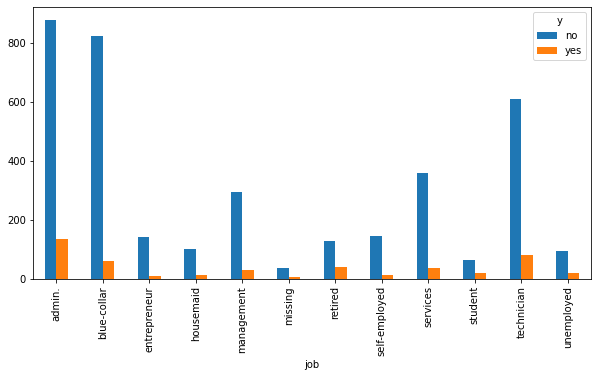

In [11]:
pd.crosstab(bank['job'].fillna('missing'), bank['y']).plot(kind = 'bar')
bank["job"].value_counts(dropna = False)

university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
NaN                     167
illiterate                1
Name: education, dtype: int64

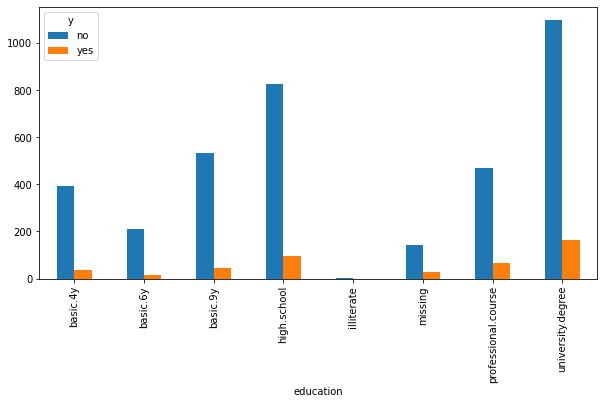

In [12]:
pd.crosstab(bank['education'].fillna('missing'), bank['y']).plot(kind = 'bar')
bank["education"].value_counts(dropna = False)

We will replace the missing values for job with the majority class which is the best option here while education is having significant amount of missing values so replace them with category 'unknown'.

In [13]:
#impute null job, education
bank['job'].replace(np.nan, 'admin.', inplace = True)
bank['education'].replace(np.nan, 'unknown', inplace = True)

In [14]:
bank["marital"].value_counts(dropna = False)

married     2509
single      1153
divorced     446
NaN           11
Name: marital, dtype: int64

We will replace the missing values in marital column with the majority class 'married'.

In [15]:
#impute null marital
bank['marital'].replace(np.nan, 'married', inplace = True)

In [16]:
bank["poutcome"].value_counts(dropna = False)

NaN        3523
failure     454
success     142
Name: poutcome, dtype: int64






Is poutcome related with pdays?

In [17]:
pd.crosstab(bank['poutcome'].fillna('missing'), bank['pdays'])

pdays,0,1,2,3,4,5,6,7,9,10,...,12,13,14,15,16,17,18,19,21,999
poutcome,,,,,,,,,,,,,,,,,,,,,
failure,0,0,0,2,0,0,3,1,2,2,...,1,1,1,1,0,1,2,0,1,436
missing,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3523
success,2,3,4,50,14,4,39,9,1,6,...,4,1,0,1,2,0,0,1,0,0


<AxesSubplot:xlabel='poutcome', ylabel='pdays'>

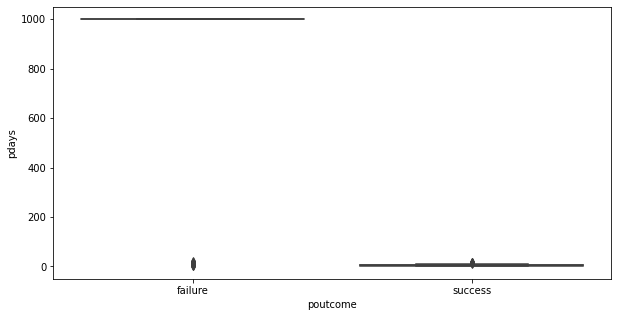

In [18]:
sns.boxplot(x="poutcome", y = "pdays", data = bank)

We see that there are significant number of new clients, who have not been contacted in the previous campaign have null values for poutcome. Hence we will replace the missing values in poutcome back to the category 'nonexistent', as we do not know the outcome from the previous campaign for these clients.

In [19]:
#impute null poutcome
bank['poutcome'].replace(np.nan, 'nonexistent', inplace = True)

In [20]:
bank["housing"].value_counts(dropna = False)

yes    2175
no     1839
NaN     105
Name: housing, dtype: int64

In [21]:
bank["loan"].value_counts(dropna = False)

no     3349
yes     665
NaN     105
Name: loan, dtype: int64

In [22]:
bank["default"].value_counts(dropna = False)

no     3315
NaN     803
yes       1
Name: default, dtype: int64

For the above three columns related to housing loan, personal loan and credit default with bank, there are significant amount of null values. Imputing them with the majority class may make our data unbalanced and affect our classification. Hence it is better to keep them as 'unknown'.

In [23]:
#impute null loan, housing, default
bank['loan'].replace(np.nan, 'unknown', inplace = True)
bank['housing'].replace(np.nan, 'unknown', inplace = True)
bank['default'].replace(np.nan, 'unknown', inplace = True)

Now let us look at the numerical columns

Text(0.5, 1.0, 'nr.employed Histogram')

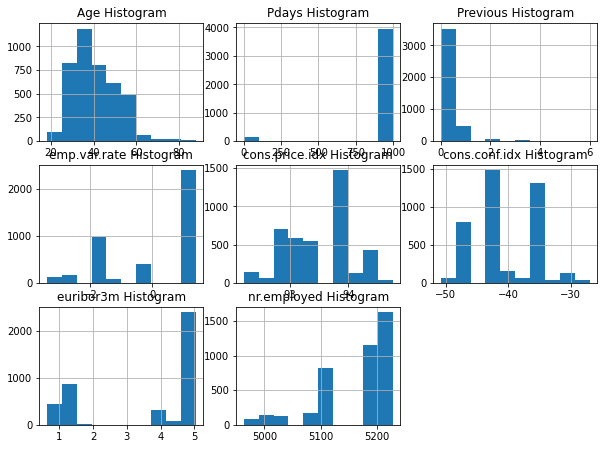

In [24]:
#Distribution of numerical features
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(15, 10))

# Size of matplotlib figures that contain subplots
fizsize_with_subplots = (10, 10)

# Size of matplotlib histogram bins
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (4, 3)

# Plot the Age histogram
plt.subplot2grid(fig_dims, (0, 0))
bank['age'].hist()
plt.title('Age Histogram')

# Plot the pdays histogram
plt.subplot2grid(fig_dims, (0, 1))
bank['pdays'].hist()
plt.title('Pdays Histogram')

# Plot the previous histogram
plt.subplot2grid(fig_dims, (0, 2))
bank['previous'].hist()
plt.title('Previous Histogram')

# Plot the emp.var.rate histogram
plt.subplot2grid(fig_dims, (1, 0))
bank['emp.var.rate'].hist()
plt.title('emp.var.rate Histogram')

# Plot the cons.price.idx histogram
plt.subplot2grid(fig_dims, (1, 1))
bank['cons.price.idx'].hist()
plt.title('cons.price.idx Histogram')

# Plot the cons.conf.idx histogram
plt.subplot2grid(fig_dims, (1, 2))
bank['cons.conf.idx'].hist()
plt.title('cons.conf.idx Histogram')

# Plot the euribor3m histogram
plt.subplot2grid(fig_dims, (2, 0))
bank['euribor3m'].hist()
plt.title('euribor3m Histogram')

# Plot the nr.employed histogram
plt.subplot2grid(fig_dims, (2, 1))
bank['nr.employed'].hist()
plt.title('nr.employed Histogram')


In [25]:
bank.describe()

,age,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695
std,10.313362,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904
min,18.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


It appears that pdays and duration have outliers, let us examine them.

In [26]:
bank['pdays'].unique()

array([999,  12,   3,   6,   5,   2,  10,  11,   7,   1,  18,   4,  15,
         0,  16,   9,  19,  17,  13,  21,  14], dtype=int64)

<AxesSubplot:xlabel='pdays'>

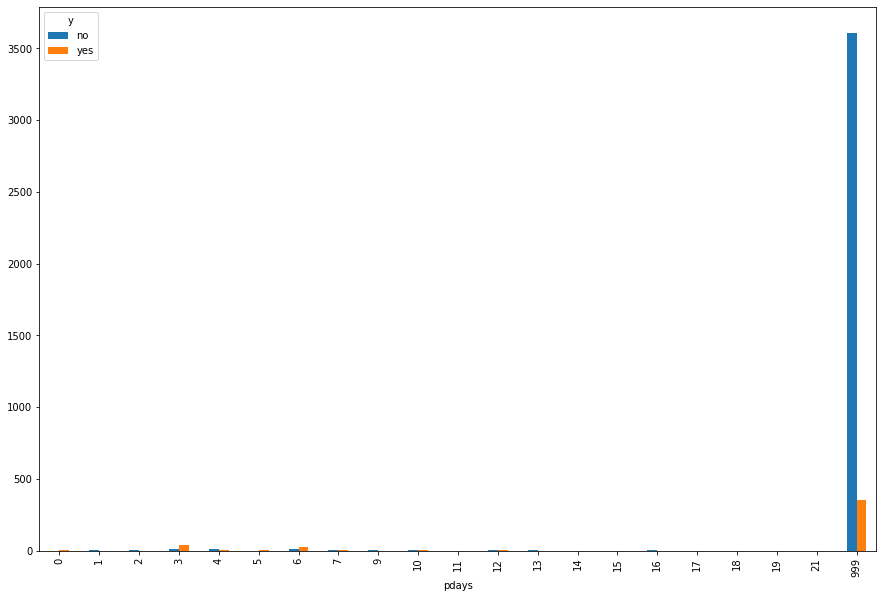

In [27]:
pd.crosstab(bank['pdays'], bank['y']).plot(kind = 'bar')

The value 999 for pdays indicates that the client is new and no contact has been made with them before. We will use binary mapping to map 999 to value 0 and all other values from 0 to 21 to 1. We are combining all other values except 999 to make their impact more balanced as compared to the majority of 999. This is done in the pre-processing steps.

<AxesSubplot:xlabel='y', ylabel='previous'>

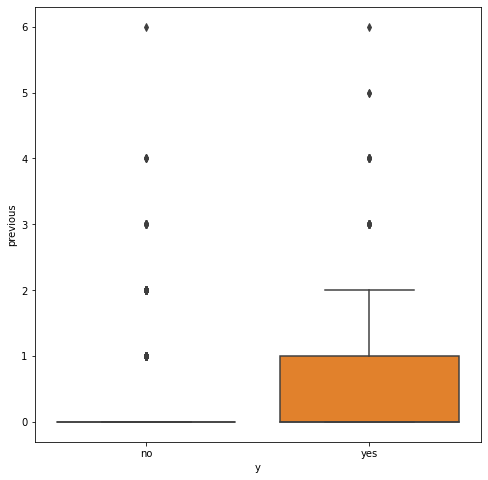

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(x="y", y = "previous", data = bank)

Remove outliers from previous

In [29]:
print(bank['previous'].quantile(0.05))
print(bank['previous'].quantile(0.95))

0.0
1.0


In [30]:
bank['previous'] = np.where(bank['previous'] >2, 2, bank['previous'])

<AxesSubplot:xlabel='y', ylabel='previous'>

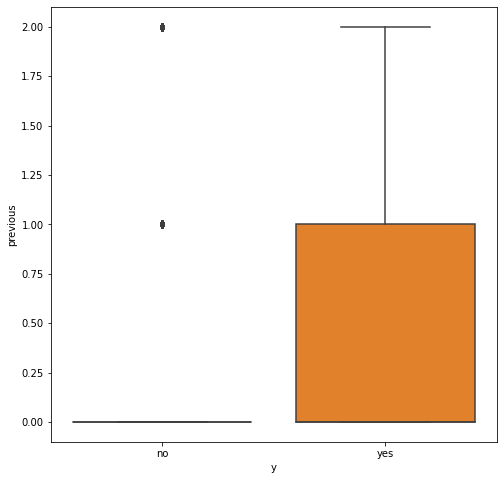

In [31]:
plt.figure(figsize=(8,8))
sns.boxplot(x="y", y = "previous", data = bank)

<AxesSubplot:xlabel='y', ylabel='age'>

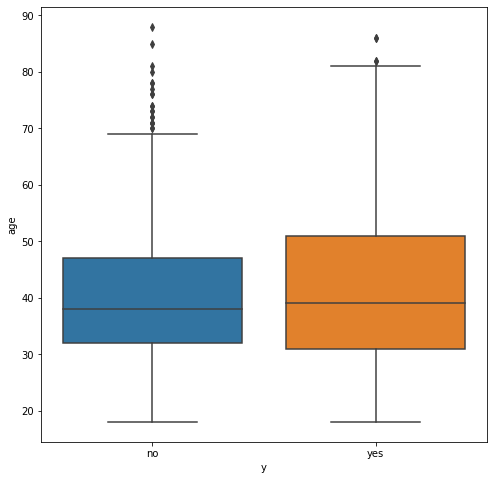

In [32]:
plt.figure(figsize=(8,8))
sns.boxplot(x="y", y = "age", data = bank)

Check correlation between features with heatmap

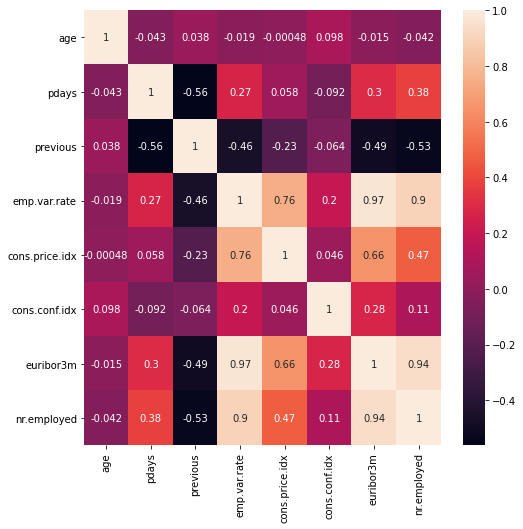

In [33]:
corrMatrix = bank.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

We see that the economic variables euribor3m and nr.employed (no. of employees quaterly indicator) are highly correlated with emp.var.rate (employee variation rate quaterly indicator) as they should be. From the box plot of emp.var.rate we can see that it would not be much helpful for classification of y. We can drop emp.var.rate.

<AxesSubplot:xlabel='y', ylabel='emp.var.rate'>

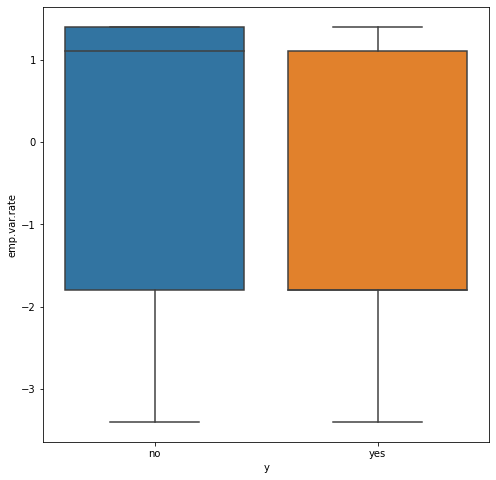

In [34]:
plt.figure(figsize=(8,8))
sns.boxplot(x="y", y = "emp.var.rate", data = bank)

In [35]:
bank.drop(['emp.var.rate'], axis=1, inplace=True)

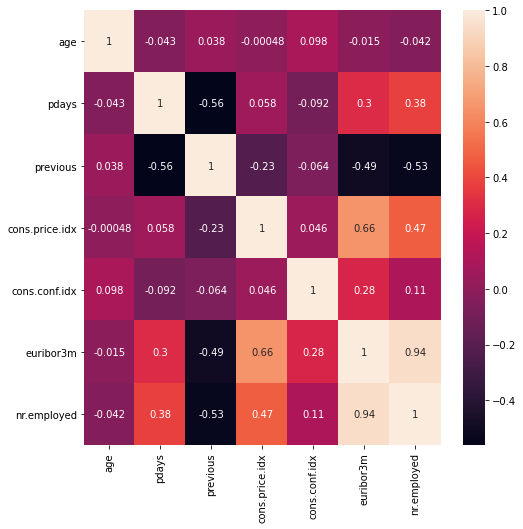

In [36]:
corrMatrix = bank.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### Target variable y

<AxesSubplot:title={'center':'y value counts'}>

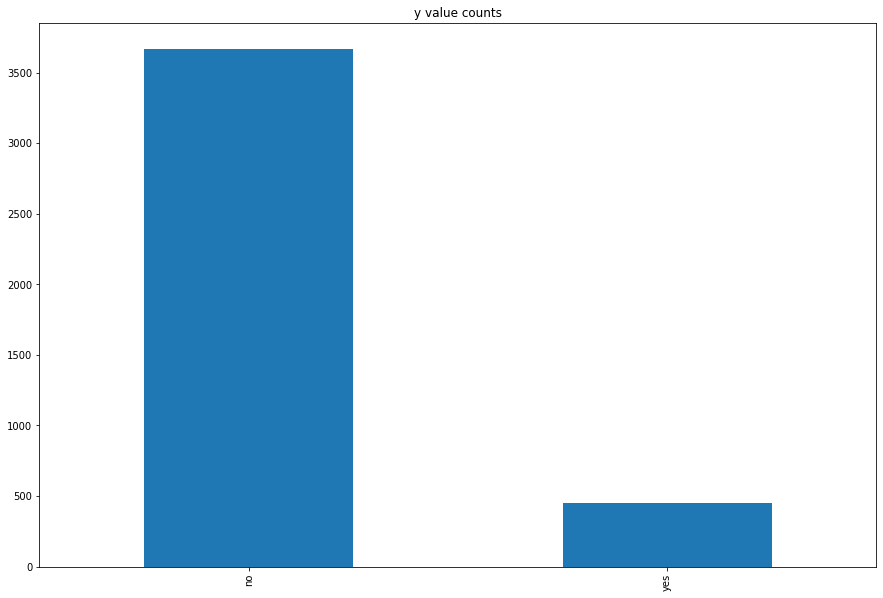

In [37]:
value_counts = bank['y'].value_counts()

value_counts.plot.bar(title = 'y value counts')

The distribution of the target variable shows that our dataset is highly imbalanced, so we cannot use accuracy as a reliable measure for finding the best model. We will use evaluation measures like confusion matrix, precision, recall, f1-score, roc_auc score and roc curve to evaluate our classification models. Let us proceed with pre-processing and model building.

## Data Pre-processing

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   pdays           4119 non-null   int64  
 8   previous        4119 non-null   int64  
 9   poutcome        4119 non-null   object 
 10  cons.price.idx  4119 non-null   float64
 11  cons.conf.idx   4119 non-null   float64
 12  euribor3m       4119 non-null   float64
 13  nr.employed     4119 non-null   float64
 14  y               4119 non-null   object 
dtypes: float64(4), int64(3), object(8)
memory usage: 482.8+ KB


We will use one-hot or dummy encoding for features job, marital, default, housing, loan, poutcome and mapping for pdays and target y.

In [39]:
for column in ['job', 'education', 'marital', 'default', 'housing', 'loan', 'poutcome']:
    dummies = pd.get_dummies(bank[column], prefix = column)
    bank[dummies.columns] = dummies
    bank.drop(column, axis = 1, inplace = True)

In [40]:
# Binary map if called or not
bank["pdays"] = bank["pdays"].map({999: 0, 0: 1, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1,
                                     13: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 19: 1, 20: 1, 21: 1, 22: 1,
                                  25: 1, 26: 1, 27:1}).astype(int)

In [41]:
bank['y'] = bank['y'].map({'no':0, 'yes':1}).astype(int)

In [42]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            4119 non-null   int64  
 1   pdays                          4119 non-null   int32  
 2   previous                       4119 non-null   int64  
 3   cons.price.idx                 4119 non-null   float64
 4   cons.conf.idx                  4119 non-null   float64
 5   euribor3m                      4119 non-null   float64
 6   nr.employed                    4119 non-null   float64
 7   y                              4119 non-null   int32  
 8   job_admin.                     4119 non-null   uint8  
 9   job_blue-collar                4119 non-null   uint8  
 10  job_entrepreneur               4119 non-null   uint8  
 11  job_housemaid                  4119 non-null   uint8  
 12  job_management                 4119 non-null   u

In [43]:
bank.head()

,age,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,...,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success
0,30,0,0,92.893,-46.2,1.313,5099.1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
1,39,0,0,93.994,-36.4,4.855,5191.0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
2,25,0,0,94.465,-41.8,4.962,5228.1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
3,38,0,0,94.465,-41.8,4.959,5228.1,0,0,0,...,0,0,1,0,0,1,0,0,1,0
4,47,0,0,93.200,-42.0,4.191,5195.8,0,1,0,...,0,0,0,1,1,0,0,0,1,0


In [44]:
X = bank.drop('y', axis = 1)
y = bank['y']

# Spliting and Scaling

In [45]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [47]:
from sklearn.model_selection import train_test_split
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

In [48]:
print("Size of training set: {}  size of test set:"
      " {}\n".format(X_train_org.shape[0],X_test_org.shape[0]))

Size of training set: 3089  size of test set: 1030



In [49]:
print("Checking the balance status of y train data set\n",y_train.value_counts())

Checking the balance status of y train data set
 0    2739
1     350
Name: y, dtype: int64


#### As we have highly unbalanced dataset, we will be using synthetic over-sampling method for positive class to make the train dataset balanced and use it to train our models for classification accuracy. We will be using Adaptive Synthetic Sampling (ADASYN) available in imblearn.

In [50]:
X_res, y_train = ADASYN(random_state = 42).fit_resample(X_train_org, y_train)

print(X_res.shape)
print(y_train.shape)

(5575, 41)
(5575,)


We will use min-max scaler as we have removed the outliers from our data and the distribution of features is not following normal distribution.

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_res))
X_test = pd.DataFrame(scaler.transform(X_test_org))

In [52]:
print("Checking the balance status of y train data set\n",y_train.value_counts())

Checking the balance status of y train data set
 1    2836
0    2739
Name: y, dtype: int64


In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5575, 41)
(5575,)
(1030, 41)
(1030,)


# Project 1

# Model Building
We will use grid search with cross-validation for all of our models.

## kNN classifier

In [54]:
knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors':[1,2,3,5,7,10,15,25],
              'leaf_size':[1,3,5,7],
              'algorithm':['auto']}

#Fit the model 5-fold cross validation
KNN_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring = 'roc_auc', n_jobs=-1)
knn=KNN_grid.fit(X_train, y_train)
print("Best parameters: {}".format(knn.best_params_))
print("Best cross-validation score: {:.2f}".format(knn.best_score_))

Best parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 10}
Best cross-validation score: 0.96


In [55]:
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_knn = pd.DataFrame([['KNN_GridCV', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_knn)
results=model_results_knn

        Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  KNN_GridCV  0.852427   0.247525  0.247525  0.247525  0.582858


In [56]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[853  76]
 [ 76  25]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       929
           1       0.25      0.25      0.25       101

    accuracy                           0.85      1030
   macro avg       0.58      0.58      0.58      1030
weighted avg       0.85      0.85      0.85      1030



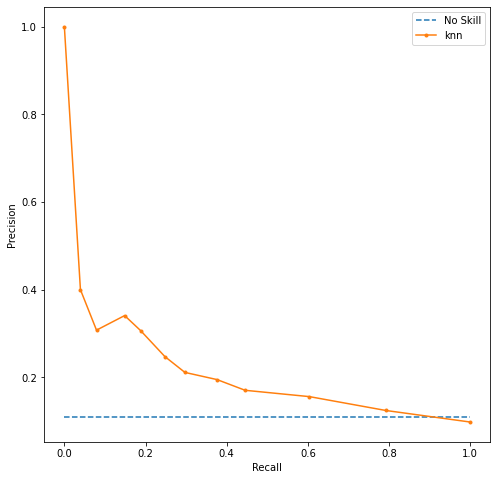

In [57]:
#precision recall curve
yhat = knn.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
plt.plot(recall, precision, marker='.', label='knn')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [58]:
fpr, tpr, _ = roc_curve(y_test,  pos_probs)
roc_table = pd.DataFrame([['KNN', fpr, tpr]],
               columns=['classifiers', 'fpr', 'tpr'])

## Logistic Regression

In [59]:
lreg=LogisticRegression(random_state = 0)
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001,0.01,0.1,10,100,1000]
max_iter=[10,100,1000]
hyperparameters = dict(C=C, penalty=penalty, max_iter=max_iter)

# Create grid search using 5-fold cross validation
grid_lreg = GridSearchCV(lreg, hyperparameters, cv=5, scoring = 'roc_auc', verbose=0)
# Fit grid search
logistic = grid_lreg.fit(X_train, y_train)
print("Best parameters: {}".format(logistic.best_params_))
print("Best cross-validation score: {:.2f}".format(logistic.best_score_))

Best parameters: {'C': 0.1, 'max_iter': 10, 'penalty': 'l2'}
Best cross-validation score: 0.96


In [60]:
y_pred = logistic.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_lr = pd.DataFrame([['Logistic_Regression_GridCV', acc, prec, rec, f1, roc_auc]],
                                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])
print(model_results_lr)
results = results.append(model_results_lr, ignore_index = True)

                        Model  Accuracy  Precision    Recall  F1 Score  \
0  Logistic_Regression_GridCV  0.897087   0.439024  0.178218  0.253521   

   ROC_AUC  
0  0.57673  


In [61]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[906  23]
 [ 83  18]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.94       929
           1       0.44      0.18      0.25       101

    accuracy                           0.90      1030
   macro avg       0.68      0.58      0.60      1030
weighted avg       0.87      0.90      0.88      1030



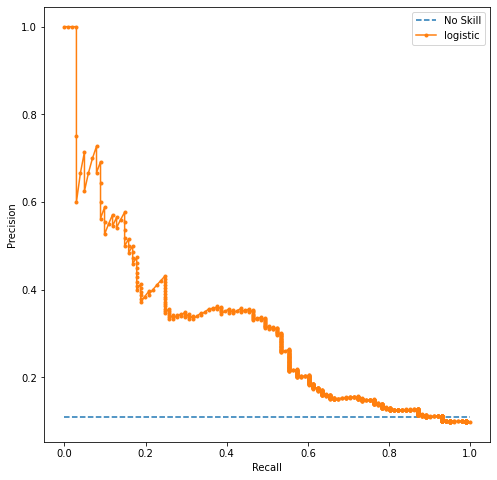

In [62]:
#precision recall curve
yhat = logistic.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.figure(figsize=(8,8))
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [63]:
fpr, tpr, _ = roc_curve(y_test,  pos_probs)
roc_table = roc_table.append({'classifiers': 'Logistic',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Linear SVC

In [64]:
linear_SVM = LinearSVC(random_state=0)
# Grid serach for hyperparameter tuning
param_grid_svm = {'C': [0.001, 0.01, 0.10, 1, 10, 11, 100]}  
 
linsvm_grid = GridSearchCV(linear_SVM, param_grid_svm, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
linSVM = linsvm_grid.fit(X_train, y_train)
print("Best parameters: {}".format(linSVM.best_params_))
print("Best cross-validation score: {:.2f}".format(linSVM.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  35 | elapsed:    0.0s remaining:    0.1s


Best parameters: {'C': 0.1}
Best cross-validation score: 0.96


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.2s finished


In [65]:
#Predict test data using best model
y_pred=linSVM.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_linsvm = pd.DataFrame([['LinearSVM_GridCV', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])
print(model_results_linsvm)
results = results.append(model_results_linsvm, ignore_index = True)

              Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  LinearSVM_GridCV  0.903883   0.533333  0.158416  0.244275  0.571673


In [66]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[915  14]
 [ 85  16]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95       929
           1       0.53      0.16      0.24       101

    accuracy                           0.90      1030
   macro avg       0.72      0.57      0.60      1030
weighted avg       0.88      0.90      0.88      1030



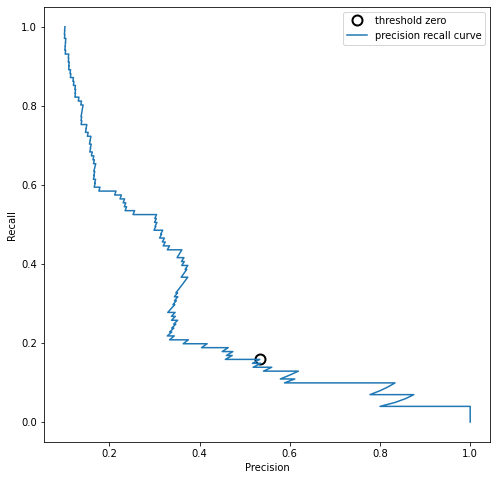

In [67]:
precision, recall, thresholds = precision_recall_curve(y_test, linSVM.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.figure(figsize=(8,8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [68]:
fpr, tpr, _ = roc_curve(y_test, linSVM.decision_function(X_test))
roc_table = roc_table.append({'classifiers': 'linSVM',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## SVM - linear

In [69]:
kernelSVM_lin = SVC(kernel = 'linear')
param_grid_ksvm_lin = {'C': [0.001,0.01, 0.1, 1, 10]}  
ksvm_lin_grid = GridSearchCV(kernelSVM_lin, param_grid_ksvm_lin, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs = -1)
kernelsvm_lin= ksvm_lin_grid.fit(X_train, y_train)
print("Best parameters: {}".format(kernelsvm_lin.best_params_))
print("Best cross-validation score: {:.2f}".format(kernelsvm_lin.best_score_))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    3.3s remaining:    1.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.9s finished


Best parameters: {'C': 0.01}
Best cross-validation score: 0.96


In [70]:
#Predict test data using best model
y_pred = kernelsvm_lin.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_klsvm = pd.DataFrame([['SVM_KernelLinear_GridCV', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_klsvm)
results = results.append(model_results_klsvm, ignore_index = True)

                     Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  SVM_KernelLinear_GridCV  0.902913   0.517241  0.148515  0.230769  0.566722


In [71]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[915  14]
 [ 86  15]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       929
           1       0.52      0.15      0.23       101

    accuracy                           0.90      1030
   macro avg       0.72      0.57      0.59      1030
weighted avg       0.88      0.90      0.88      1030



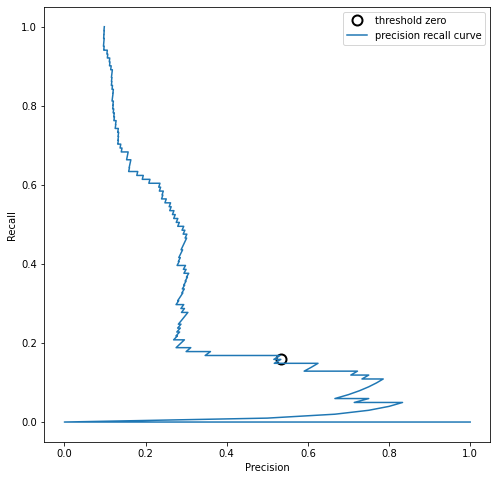

In [72]:
precision, recall, thresholds = precision_recall_curve(y_test, kernelsvm_lin.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.figure(figsize=(8,8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [73]:
fpr, tpr, _ = roc_curve(y_test, kernelsvm_lin.decision_function(X_test))
roc_table = roc_table.append({'classifiers': 'KernelSVM_lin',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## SVM - poly

In [74]:
kernelSVM_poly = SVC()
# Grid serach for hyperparameter tuning 
param_grid_ksvm_poly = {'C': [0.1, 1, 10, 20, 100], 'degree': [1,3,4,5], 'coef0': [1], 
                       'kernel': ['poly']}  
ksvm_poly_grid = GridSearchCV(kernelSVM_poly, param_grid_ksvm_poly, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
kernelsvm_poly= ksvm_poly_grid.fit(X_train, y_train)
print("Best parameters: {}".format(kernelsvm_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(kernelsvm_poly.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   18.7s finished


Best parameters: {'C': 0.1, 'coef0': 1, 'degree': 5, 'kernel': 'poly'}
Best cross-validation score: 0.96


In [75]:
#Predict test data using best model
y_pred = kernelsvm_poly.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_polysvm = pd.DataFrame([['SVM_KernelPoly_GridCV', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_polysvm)
results = results.append(model_results_polysvm, ignore_index = True)

                   Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  SVM_KernelPoly_GridCV  0.895146   0.410256  0.158416  0.228571  0.566829


In [76]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[906  23]
 [ 85  16]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       929
           1       0.41      0.16      0.23       101

    accuracy                           0.90      1030
   macro avg       0.66      0.57      0.59      1030
weighted avg       0.86      0.90      0.87      1030



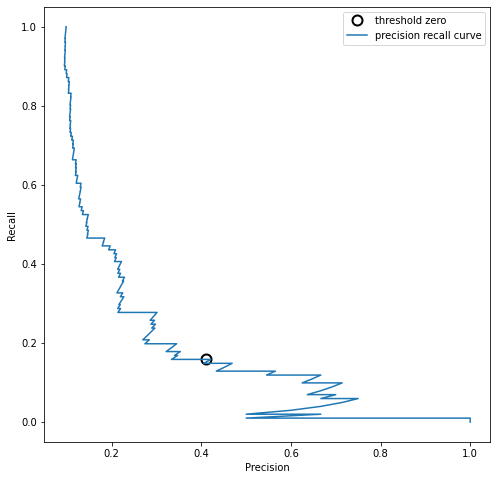

In [77]:
precision, recall, thresholds = precision_recall_curve(y_test, kernelsvm_poly.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))
plt.figure(figsize=(8,8))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

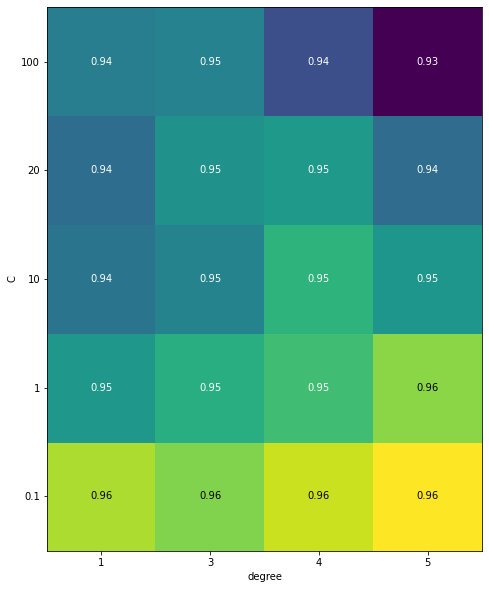

In [78]:
import mglearn
scores = np.array(pd.DataFrame(ksvm_poly_grid.cv_results_).mean_test_score).reshape(5, 4)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='degree', xticklabels=param_grid_ksvm_poly['degree'], ylabel='C', yticklabels=param_grid_ksvm_poly['C'], cmap="viridis")

In [79]:
fpr, tpr, _ = roc_curve(y_test, kernelsvm_poly.decision_function(X_test))
roc_table = roc_table.append({'classifiers': 'KernelSVM_poly',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## SVM - rbf

In [80]:
kernelSVM_rbf = SVC()
# Grid search
param_grid_ksvm_rbf = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
ksvm_rbf_grid = GridSearchCV(kernelSVM_rbf, param_grid_ksvm_rbf, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
kernelsvm_rbf= ksvm_rbf_grid.fit(X_train, y_train)
print("Best parameters: {}".format(kernelsvm_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(kernelsvm_rbf.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    5.8s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   33.2s finished


Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [81]:
#Predict test data using best model
y_pred = kernelsvm_rbf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_rbfsvm = pd.DataFrame([['SVM_Kernelrbf_GridCV', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_rbfsvm)
results = results.append(model_results_rbfsvm, ignore_index = True)

                  Model  Accuracy  Precision  Recall  F1 Score  ROC_AUC
0  SVM_Kernelrbf_GridCV  0.901942        0.0     0.0       0.0      0.5


In [82]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[929   0]
 [101   0]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       929
           1       0.00      0.00      0.00       101

    accuracy                           0.90      1030
   macro avg       0.45      0.50      0.47      1030
weighted avg       0.81      0.90      0.86      1030



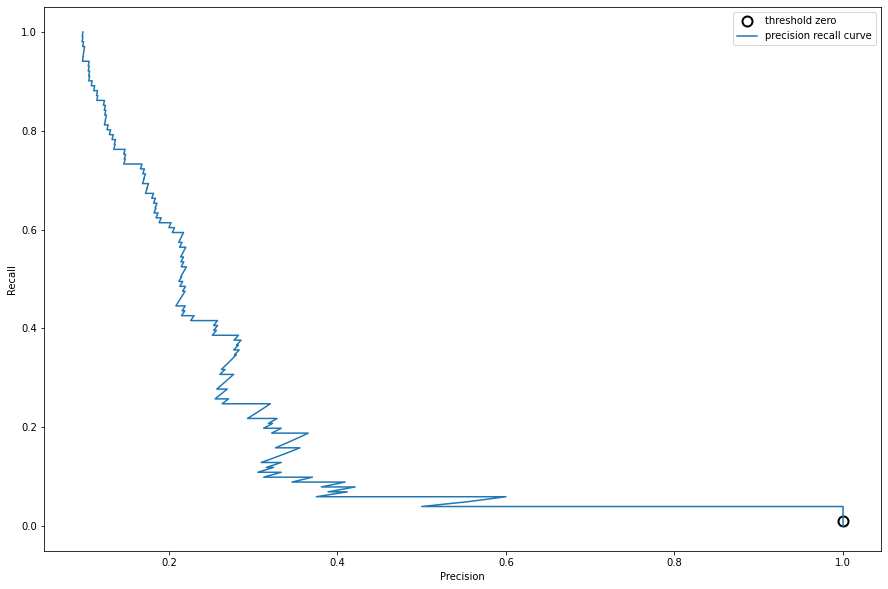

In [83]:
precision, recall, thresholds = precision_recall_curve(y_test, kernelsvm_rbf.decision_function(X_test))

close_zero = np.argmin(np.abs(thresholds))

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

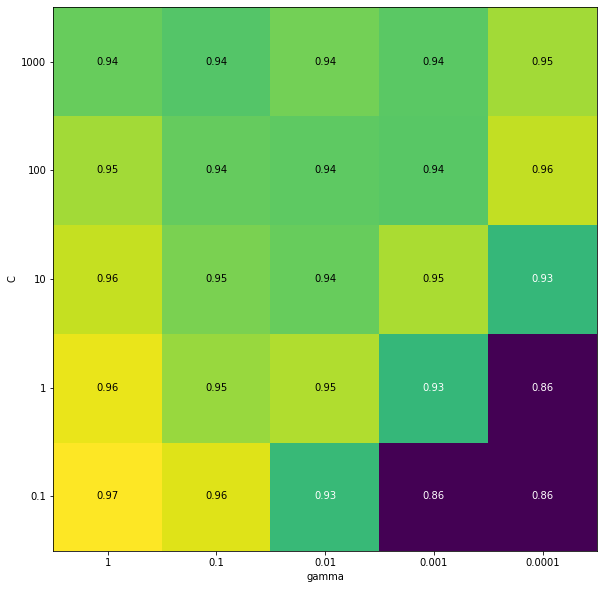

In [84]:
import mglearn
scores = np.array(pd.DataFrame(ksvm_rbf_grid.cv_results_).mean_test_score).reshape(5, 5)

# plot the mean cross-validation scores
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid_ksvm_rbf['gamma'], ylabel='C', yticklabels=param_grid_ksvm_rbf['C'], cmap="viridis")

In [85]:
fpr, tpr, _ = roc_curve(y_test, kernelsvm_rbf.decision_function(X_test))
roc_table = roc_table.append({'classifiers': 'KernelSVM_rbf',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Decision tree classifier

In [86]:
dtree = DecisionTreeClassifier(random_state = 0)
param_grid_dtree = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20, 30, 40, 70, 75],
              "max_depth": [7, 10, 20, 30]
              }
dtree_grid = GridSearchCV(dtree, param_grid_dtree, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
model_dtree = dtree_grid.fit(X_train, y_train)
print("Best parameters: {}".format(model_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(model_dtree.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s


Best parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 75}
Best cross-validation score: 0.94


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.3s finished


In [87]:
# Predicting Test Set
y_pred = model_dtree.predict(X_test) 

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_dtree = pd.DataFrame([['Decision_tree_GridCV', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_dtree)
results = results.append(model_results_dtree, ignore_index = True)

                  Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  Decision_tree_GridCV  0.861165      0.325  0.386139  0.352941  0.649474


In [88]:
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

Confusion matrix:
[[848  81]
 [ 62  39]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       929
           1       0.33      0.39      0.35       101

    accuracy                           0.86      1030
   macro avg       0.63      0.65      0.64      1030
weighted avg       0.87      0.86      0.87      1030



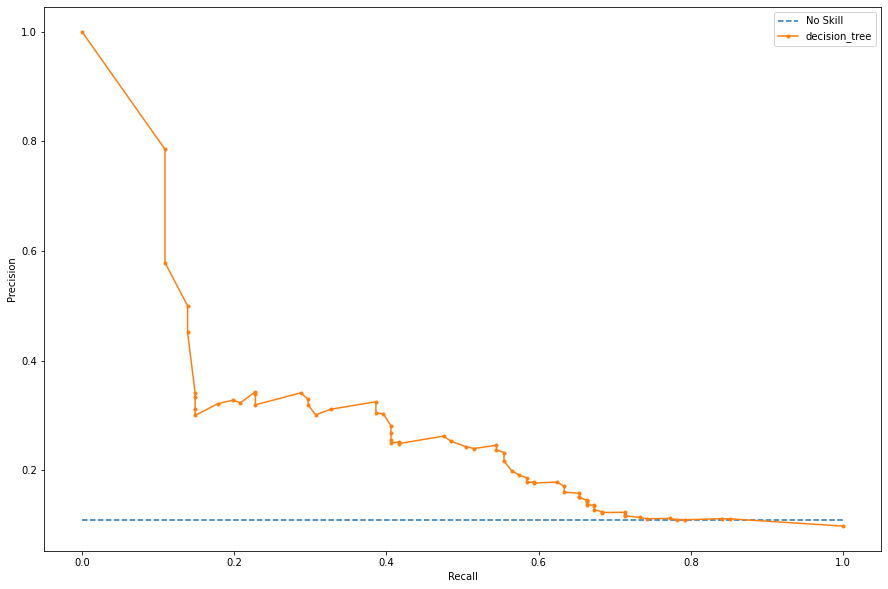

In [89]:
#precision recall curve
yhat = model_dtree.predict_proba(X_test)
pos_probs = yhat[:, 1]
# calculate the no skill line as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)
# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, _ = precision_recall_curve(y_test, pos_probs)
plt.plot(recall, precision, marker='.', label='decision_tree')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [90]:
fpr, tpr, _ = roc_curve(y_test, pos_probs)
roc_table = roc_table.append({'classifiers': 'Decision_tree',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Model comparision

In order to compare the models and analyze the results, we need to decide our requirements.

1. False Positives - The clients did NOT SUBSCRIBE to term deposit, but the model predicts they did
   False Negatives - The clients SUBSCRIBED to term deposit, but the model predicts they did not
   
False Positives are more harmful to the firm as compared to False Negatives because it will cost the bank more money to market their product to the clients who will not subscribe to it eventually. Hence we need to reduce the amount of False Positives, maximize our accuracy and True Positives. Hence, a balance between True Positive Rate and False Positive Rate is needed.

Area under the ROC curve (TPR vs FPR) is the best way to go about this. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes. Higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s. We will use 'roc_auc' score as a metric to determine the best model. Higher the roc_auc score, higher the area under the curve.

In [91]:
org_results = pd.DataFrame(results)
print(results)

                        Model  Accuracy  Precision    Recall  F1 Score  \
0                  KNN_GridCV  0.852427   0.247525  0.247525  0.247525   
1  Logistic_Regression_GridCV  0.897087   0.439024  0.178218  0.253521   
2            LinearSVM_GridCV  0.903883   0.533333  0.158416  0.244275   
3     SVM_KernelLinear_GridCV  0.902913   0.517241  0.148515  0.230769   
4       SVM_KernelPoly_GridCV  0.895146   0.410256  0.158416  0.228571   
5        SVM_Kernelrbf_GridCV  0.901942   0.000000  0.000000  0.000000   
6        Decision_tree_GridCV  0.861165   0.325000  0.386139  0.352941   

    ROC_AUC  
0  0.582858  
1  0.576730  
2  0.571673  
3  0.566722  
4  0.566829  
5  0.500000  
6  0.649474  


Decision trees have high roc_auc score of 0.6494. Let us look at the confusion matrices.

In [92]:
confusion = confusion_matrix(y_test, knn.predict(X_test))
print("Confusion matrix knn:\n{}".format(confusion))
confusion = confusion_matrix(y_test, logistic.predict(X_test))
print("Confusion matrix logistic:\n{}".format(confusion))
confusion = confusion_matrix(y_test, linSVM.predict(X_test))
print("Confusion matrix linSVC:\n{}".format(confusion))
confusion = confusion_matrix(y_test, kernelsvm_lin.predict(X_test))
print("Confusion matrix kernelSVM_lin:\n{}".format(confusion))
confusion = confusion_matrix(y_test, kernelsvm_poly.predict(X_test))
print("Confusion matrix kernelSVM_poly:\n{}".format(confusion))
confusion = confusion_matrix(y_test, kernelsvm_rbf.predict(X_test))
print("Confusion matrix kernelSVM_rbf:\n{}".format(confusion))
confusion = confusion_matrix(y_test, model_dtree.predict(X_test))
print("Confusion matrix decision_tree:\n{}".format(confusion))

Confusion matrix knn:
[[853  76]
 [ 76  25]]
Confusion matrix logistic:
[[906  23]
 [ 83  18]]
Confusion matrix linSVC:
[[915  14]
 [ 85  16]]
Confusion matrix kernelSVM_lin:
[[915  14]
 [ 86  15]]
Confusion matrix kernelSVM_poly:
[[906  23]
 [ 85  16]]
Confusion matrix kernelSVM_rbf:
[[929   0]
 [101   0]]
Confusion matrix decision_tree:
[[848  81]
 [ 62  39]]


We will use decision tree as our final model because it has the highest ROC_AUC score.

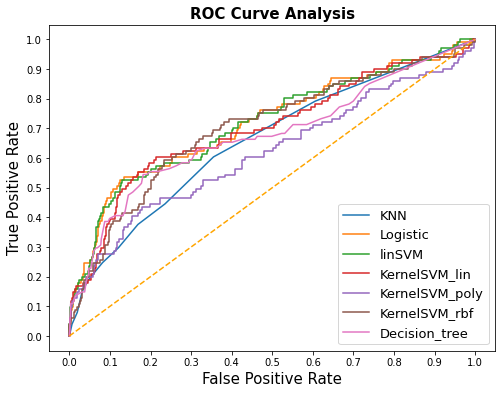

In [93]:
#ROC curves for the models
fig = plt.figure(figsize=(8,6))

for i in roc_table.index:
    plt.plot(roc_table.loc[i]['fpr'], 
             roc_table.loc[i]['tpr'], label="{}".format(roc_table.loc[i]['classifiers']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

### Final model : Decision tree

In [94]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_split= 75, random_state = 0)
model_dtree = dtree.fit(X_train, y_train)
predicted = model_dtree.predict(X_test)
print("Train Set classification report:\n" ,classification_report(y_train, model_dtree.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, model_dtree.predict(X_test)))

Train Set classification report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      2739
           1       0.93      0.89      0.91      2836

    accuracy                           0.91      5575
   macro avg       0.91      0.91      0.91      5575
weighted avg       0.91      0.91      0.91      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.93      0.91      0.92       929
           1       0.33      0.39      0.35       101

    accuracy                           0.86      1030
   macro avg       0.63      0.65      0.64      1030
weighted avg       0.87      0.86      0.87      1030



In [95]:
out = pd.DataFrame(predicted.reshape(-1,1), columns = ['predicted'])
out['predicted'].value_counts()

0    910
1    120
Name: predicted, dtype: int64

# Project 2

### Here we will use the same data and pre-processing steps from previous part. 

## Ensembles

## Hard voting

In [96]:
log_clf = LogisticRegression(C= 0.1, max_iter= 10, penalty= 'l2', random_state=0)
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 10)
knn_clf.fit(X_train, y_train)
#svc_clf = LinearSVC(C= 0.1,random_state=0)
#svc_clf.fit(X_train, y_train)
svm_clf = SVC(kernel = 'poly', C= 0.01, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('ksvc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

LogisticRegression 0.5767300088458791
KNeighborsClassifier 0.582858178175191
SVC 0.5868441526606912
VotingClassifier 0.5850163595476877


In [97]:
results_HV = pd.DataFrame([['Hard_Voting_clf', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_HV

## Soft voting

In [98]:
log_clf = LogisticRegression(C= 0.1, max_iter= 10, penalty= 'l2',random_state=0)
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(algorithm= 'auto', leaf_size= 5, n_neighbors= 10)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(kernel = 'poly', C= 0.01, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('ksvc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, roc_auc_score(y_test, y_pred))
    
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

LogisticRegression 0.5767300088458791
KNeighborsClassifier 0.582858178175191
SVC 0.5868441526606912
VotingClassifier 0.5861993626703897


In [99]:
results_SV = pd.DataFrame([['Soft_Voting_clf', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_SV, ignore_index=True)

Both Hard Voting Classifier and Soft Voting Classifier give us roc_auc score around 0.5855.

## Bagging and Pasting: Decision Tree Classifier

In [100]:
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_split= 75, random_state = 0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=5, max_samples=1000, bootstrap=True, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix decision_tree:\n{}".format(confusion))
print("Train Set classification report:\n" ,classification_report(y_train, bag_clf.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, bag_clf.predict(X_test)))

Train score: 0.90
Test score: 0.87
Out-of-bag score: 0.89
roc_auc score: 0.70
Confusion matrix decision_tree:
[[842  87]
 [ 51  50]]
Train Set classification report:
               precision    recall  f1-score   support

           0       0.88      0.92      0.90      2739
           1       0.92      0.88      0.90      2836

    accuracy                           0.90      5575
   macro avg       0.90      0.90      0.90      5575
weighted avg       0.90      0.90      0.90      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.92       929
           1       0.36      0.50      0.42       101

    accuracy                           0.87      1030
   macro avg       0.65      0.70      0.67      1030
weighted avg       0.89      0.87      0.87      1030



In [101]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_dtbag = pd.DataFrame([['Bagging_DTree', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_dtbag, ignore_index=True)

#### roc_auc score without bagging: 0.65, accuracy: 0.86
#### roc_auc score with bagging: 0.7, accuracy: 0.87

In [102]:
dt_clf = DecisionTreeClassifier(criterion= 'gini', max_depth= 20, min_samples_split= 75, random_state = 0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=400, max_samples=700, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix decision_tree:\n{}".format(confusion))
print("Train Set classification report:\n" ,classification_report(y_train, bag_clf.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, bag_clf.predict(X_test)))

Train score: 0.90
Test score: 0.86
roc_auc score: 0.70
Confusion matrix decision_tree:
[[837  92]
 [ 51  50]]
Train Set classification report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90      2739
           1       0.91      0.89      0.90      2836

    accuracy                           0.90      5575
   macro avg       0.90      0.90      0.90      5575
weighted avg       0.90      0.90      0.90      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.94      0.90      0.92       929
           1       0.35      0.50      0.41       101

    accuracy                           0.86      1030
   macro avg       0.65      0.70      0.67      1030
weighted avg       0.88      0.86      0.87      1030



In [103]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_dtpaste = pd.DataFrame([['Pasting_DTree', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_dtpaste, ignore_index=True)

#### roc_auc score without pasting: 0.65, accuracy: 0.86
#### roc_auc score with pasting: 0.7, accuracy: 0.86

## Bagging and pasting: kNN classifier

In [104]:
knn = KNeighborsClassifier(leaf_size= 5, n_neighbors= 10)
bag_clf = BaggingClassifier(knn, n_estimators=50, max_samples=500, bootstrap=True, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print("Train Set classification report:\n" ,classification_report(y_train, bag_clf.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, y_pred))

Train score: 0.85
Test score: 0.74
Out-of-bag score: 0.85
roc_auc score: 0.62
Confusion matrix:
[[716 213]
 [ 54  47]]
Train Set classification report:
               precision    recall  f1-score   support

           0       0.90      0.79      0.84      2739
           1       0.82      0.91      0.86      2836

    accuracy                           0.85      5575
   macro avg       0.86      0.85      0.85      5575
weighted avg       0.86      0.85      0.85      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       929
           1       0.18      0.47      0.26       101

    accuracy                           0.74      1030
   macro avg       0.56      0.62      0.55      1030
weighted avg       0.86      0.74      0.79      1030



In [105]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_knnbag = pd.DataFrame([['Bagging_kNN', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_knnbag, ignore_index=True)

#### roc_auc score without bagging: 0.58, accuracy: 0.85
#### roc_auc score with bagging: 0.62, accuracy: 0.74

In [106]:
knn = KNeighborsClassifier(leaf_size= 5, n_neighbors= 10)
bag_clf = BaggingClassifier(knn, n_estimators=100, max_samples=400, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print('Train score: %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n{}".format(confusion))
print("Train Set classification report:\n" ,classification_report(y_train, bag_clf.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, y_pred))

Train score: 0.85
Test score: 0.73
roc_auc score: 0.62
Confusion matrix:
[[707 222]
 [ 52  49]]
Train Set classification report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.83      2739
           1       0.81      0.91      0.86      2836

    accuracy                           0.85      5575
   macro avg       0.85      0.85      0.85      5575
weighted avg       0.85      0.85      0.85      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.93      0.76      0.84       929
           1       0.18      0.49      0.26       101

    accuracy                           0.73      1030
   macro avg       0.56      0.62      0.55      1030
weighted avg       0.86      0.73      0.78      1030



In [107]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_knnpaste = pd.DataFrame([['Pasting_kNN', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_knnpaste, ignore_index=True)

#### roc_auc score without pasting: 0.58, accuracy: 0.85
#### roc_auc score with pasting: 0.62, accuracy: 0.73

## AdaBoost: Decision Tree Classifier

In [108]:
ada_clf = AdaBoostClassifier(dt_clf, n_estimators=300, learning_rate=0.15, random_state=0)

ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print('Train score: %.2f'%ada_clf.score(X_train, y_train))
print('Test score: %.2f'%ada_clf.score(X_test, y_test))
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix decision_tree:\n{}".format(confusion))
print("Train Set classification report:\n" ,classification_report(y_train, ada_clf.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, y_pred))

Train score: 1.00
Test score: 0.88
roc_auc score: 0.62
Confusion matrix decision_tree:
[[873  56]
 [ 71  30]]
Train Set classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2739
           1       1.00      1.00      1.00      2836

    accuracy                           1.00      5575
   macro avg       1.00      1.00      1.00      5575
weighted avg       1.00      1.00      1.00      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       929
           1       0.35      0.30      0.32       101

    accuracy                           0.88      1030
   macro avg       0.64      0.62      0.63      1030
weighted avg       0.87      0.88      0.87      1030



In [109]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_dtAB = pd.DataFrame([['AdaBoost_DTree', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_dtAB, ignore_index=True)

##### roc_auc_score before AdaBoost: 0.65, accuracy: 0.86
##### roc_auc_score after AdaBoost: 0.62, accuracy: 0.88

## AdaBoost: Logistic regression

In [110]:
ada_clf = AdaBoostClassifier(log_clf, n_estimators=400, learning_rate=0.9, random_state=0)

ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)

print('Train score: %.2f'%ada_clf.score(X_train, y_train))
print('Test score: %.2f'%ada_clf.score(X_test, y_test))
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix decision_tree:\n{}".format(confusion))
print("Train Set classification report:\n" ,classification_report(y_train, ada_clf.predict(X_train)))
print("Test Set classification report:\n" ,classification_report(y_test, y_pred))

Train score: 0.89
Test score: 0.87
roc_auc score: 0.63
Confusion matrix decision_tree:
[[863  66]
 [ 68  33]]
Train Set classification report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      2739
           1       0.94      0.84      0.89      2836

    accuracy                           0.89      5575
   macro avg       0.89      0.89      0.89      5575
weighted avg       0.89      0.89      0.89      5575

Test Set classification report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       929
           1       0.33      0.33      0.33       101

    accuracy                           0.87      1030
   macro avg       0.63      0.63      0.63      1030
weighted avg       0.87      0.87      0.87      1030



In [111]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_logAB = pd.DataFrame([['AdaBoost_Logistic', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_logAB, ignore_index=True)

##### roc_auc score before AdaBoost: 0.5767, accuracy: 0.8970
##### roc_auc score after AdaBoost: 0.63, accuracy: 0.87

## Gradient Boosting

In [112]:
grbt_grid = GradientBoostingClassifier(random_state=0)
param_grid_grbt = {"learning_rate": [0.5, 0.8],
                   "n_estimators": [100, 200],
              "min_samples_split": [15, 20],
              "max_depth": [10, 20, 30]
              }
grbt_clf = GridSearchCV(grbt_grid, param_grid_grbt, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
grbt_clf.fit(X_train, y_train)
y_pred = grbt_clf.predict(X_test)

print("Best parameters: {}".format(grbt_clf.best_params_))
print("Best cross-validation score: {:.2f}".format(grbt_clf.best_score_))

print('Train score: %.2f'%grbt_clf.score(X_train, y_train))
print('Test score: %.2f'%grbt_clf.score(X_test, y_test))
print('roc_auc score: %.2f'%roc_auc_score(y_test, y_pred))
confusion = confusion_matrix(y_test, y_pred)
print("Confusion matrix decision_tree:\n{}".format(confusion))

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   16.8s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.6min finished


Best parameters: {'learning_rate': 0.5, 'max_depth': 20, 'min_samples_split': 20, 'n_estimators': 200}
Best cross-validation score: 0.98
Train score: 1.00
Test score: 0.70
roc_auc score: 0.60
Confusion matrix decision_tree:
[[883  46]
 [ 75  26]]


roc_auc score and accuracy both decrease in gradient boosting as compared to the base decision tree model.

In [113]:
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
results_grbt = pd.DataFrame([['GradientB_clf', acc, roc_auc]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_grbt, ignore_index=True)

### Feature importances using gradient boosting classifier

([<matplotlib.axis.YTick at 0x20e4f431308>,
 [Text(0, 0, 'age'),
  Text(0, 1, 'pdays'),
  Text(0, 2, 'previous'),
  Text(0, 3, 'cons.price.idx'),
  Text(0, 4, 'cons.conf.idx'),
  Text(0, 5, 'euribor3m'),
  Text(0, 6, 'nr.employed'),
  Text(0, 7, 'job_admin.'),
  Text(0, 8, 'job_blue-collar'),
  Text(0, 9, 'job_entrepreneur'),
  Text(0, 10, 'job_housemaid'),
  Text(0, 11, 'job_management'),
  Text(0, 12, 'job_retired'),
  Text(0, 13, 'job_self-employed'),
  Text(0, 14, 'job_services'),
  Text(0, 15, 'job_student'),
  Text(0, 16, 'job_technician'),
  Text(0, 17, 'job_unemployed'),
  Text(0, 18, 'education_basic.4y'),
  Text(0, 19, 'education_basic.6y'),
  Text(0, 20, 'education_basic.9y'),
  Text(0, 21, 'education_high.school'),
  Text(0, 22, 'education_illiterate'),
  Text(0, 23, 'education_professional.course'),
  Text(0, 24, 'education_university.degree'),
  Text(0, 25, 'education_unknown'),
  Text(0, 26, 'marital_divorced'),
  Text(0, 27, 'marital_married'),
  Text(0, 28, 'marital_si

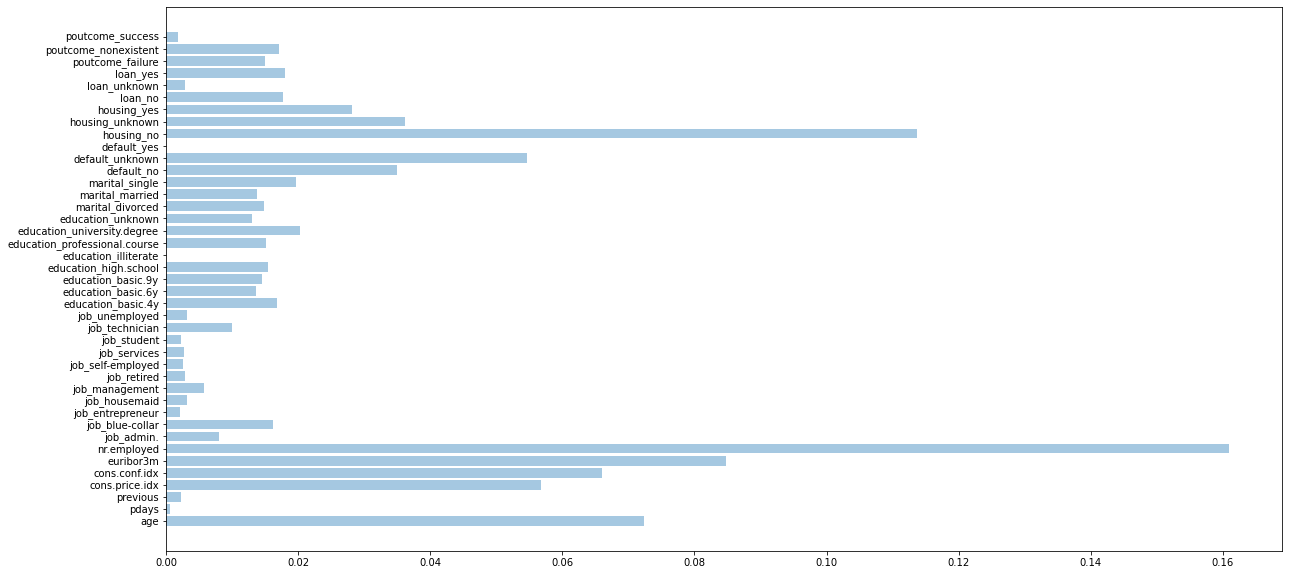

In [114]:
grbt = GradientBoostingClassifier(learning_rate=0.5, max_depth=20, min_samples_split=20, n_estimators=200, random_state=0)
grbt.fit(X_train, y_train)
%matplotlib inline

plt.subplots(figsize = (20,10))
y_list = grbt.feature_importances_
y_pos = np.arange(len(y_list))
features = list(X.columns)
plt.barh(y_pos, y_list, align='center', alpha=0.4)
plt.yticks(y_pos, features)

## Principal Component Analysis

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca= pd.DataFrame(pca.fit_transform(X_train))
X_test_pca = pd.DataFrame(pca.transform(X_test))

In [117]:
pca.explained_variance_ratio_.sum()

0.9563926586175797

In [118]:
X_train_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5575 non-null   float64
 1   1       5575 non-null   float64
 2   2       5575 non-null   float64
 3   3       5575 non-null   float64
 4   4       5575 non-null   float64
 5   5       5575 non-null   float64
 6   6       5575 non-null   float64
 7   7       5575 non-null   float64
 8   8       5575 non-null   float64
 9   9       5575 non-null   float64
 10  10      5575 non-null   float64
 11  11      5575 non-null   float64
 12  12      5575 non-null   float64
 13  13      5575 non-null   float64
 14  14      5575 non-null   float64
 15  15      5575 non-null   float64
 16  16      5575 non-null   float64
 17  17      5575 non-null   float64
 18  18      5575 non-null   float64
 19  19      5575 non-null   float64
 20  20      5575 non-null   float64
 21  21      5575 non-null   float64
 22  

# Models after dimension reduction

## kNN classifier

In [119]:
knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors':[1,2,3,5,7,10,15,25],
              'leaf_size':[1,3,5,7],
              'algorithm':['auto']}

#Fit the model 5-fold cross validation
KNN_grid = GridSearchCV(knn, knn_param_grid, cv=5, scoring = 'roc_auc', n_jobs=-1)
knn=KNN_grid.fit(X_train_pca, y_train)
print("Best parameters: {}".format(knn.best_params_))
print("Best cross-validation score: {:.2f}".format(knn.best_score_))

Best parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 10}
Best cross-validation score: 0.95


In [120]:
y_pred = knn.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred, pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_knn = pd.DataFrame([['KNN_PCA', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_knn)
results_pca=model_results_knn

     Model  Accuracy  Precision    Recall  F1 Score  ROC_AUC
0  KNN_PCA   0.83301   0.237037  0.316832  0.271186  0.60298


In [121]:
fpr, tpr, _ = roc_curve(y_test,  pos_probs)
roc_table_pca = pd.DataFrame([['KNN', fpr, tpr]],
               columns=['classifiers', 'fpr', 'tpr'])

## Logistic regression

In [122]:
lreg=LogisticRegression(random_state = 0)
penalty = ['l1', 'l2']
# Create regularization hyperparameter space
C = [0.001,0.01,0.1,10,100,1000]
max_iter=[10,100,1000]
hyperparameters = dict(C=C, penalty=penalty, max_iter=max_iter)

# Create grid search using 5-fold cross validation
grid_lreg = GridSearchCV(lreg, hyperparameters, cv=5, scoring = 'roc_auc', verbose=0)
# Fit grid search
logistic = grid_lreg.fit(X_train_pca, y_train)
print("Best parameters: {}".format(logistic.best_params_))
print("Best cross-validation score: {:.2f}".format(logistic.best_score_))

Best parameters: {'C': 0.1, 'max_iter': 10, 'penalty': 'l2'}
Best cross-validation score: 0.95


In [123]:
y_pred = logistic.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_lr = pd.DataFrame([['Logistic_Regression_PCA', acc, prec, rec, f1, roc_auc]],
                                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])
print(model_results_lr)
results_pca = results_pca.append(model_results_lr, ignore_index = True)

                     Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  Logistic_Regression_PCA  0.899029   0.459459  0.168317  0.246377  0.573394


In [124]:
fpr, tpr, _ = roc_curve(y_test,  pos_probs)
roc_table_pca = roc_table_pca.append({'classifiers': 'Logistic',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Linear SVC

In [125]:
linear_SVM = LinearSVC(random_state=0)
# Grid search for hyperparameter tuning
param_grid_svm = {'C': [0.001, 0.01, 0.10, 1, 10, 11, 100]}  
 
linsvm_grid = GridSearchCV(linear_SVM, param_grid_svm, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
linSVM = linsvm_grid.fit(X_train_pca, y_train)
print("Best parameters: {}".format(linSVM.best_params_))
print("Best cross-validation score: {:.2f}".format(linSVM.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  35 | elapsed:    0.0s remaining:    0.1s


Best parameters: {'C': 0.01}
Best cross-validation score: 0.95


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.5s finished


In [126]:
#Predict test data using best model
y_pred=linSVM.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_linsvm = pd.DataFrame([['LinearSVM_PCA', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])
print(model_results_linsvm)
results_pca = results_pca.append(model_results_linsvm, ignore_index = True)

           Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  LinearSVM_PCA  0.899029   0.457143  0.158416  0.235294  0.568982


In [127]:
fpr, tpr, _ = roc_curve(y_test, linSVM.decision_function(X_test_pca))
roc_table_pca = roc_table_pca.append({'classifiers': 'linSVM',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Kernel SVM: Linear

In [128]:
kernelSVM_lin = SVC(kernel = 'linear')
param_grid_ksvm_lin = {'C': [0.001,0.01, 0.1, 1, 10]}  
ksvm_lin_grid = GridSearchCV(kernelSVM_lin, param_grid_ksvm_lin, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs = -1)
kernelsvm_lin= ksvm_lin_grid.fit(X_train_pca, y_train)
print("Best parameters: {}".format(kernelsvm_lin.best_params_))
print("Best cross-validation score: {:.2f}".format(kernelsvm_lin.best_score_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:    2.3s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    5.0s finished


Best parameters: {'C': 0.01}
Best cross-validation score: 0.95


In [129]:
#Predict test data using best model
y_pred = kernelsvm_lin.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_klsvm = pd.DataFrame([['SVM_KernelLinear_PCA', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_klsvm)
results_pca = results_pca.append(model_results_klsvm, ignore_index = True)

                  Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  SVM_KernelLinear_PCA  0.901942        0.5  0.148515  0.229008  0.566184


In [130]:
fpr, tpr, _ = roc_curve(y_test, kernelsvm_lin.decision_function(X_test_pca))
roc_table_pca = roc_table_pca.append({'classifiers': 'KernelSVM_lin',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Kernel SVM: Poly

In [131]:
kernelSVM_poly = SVC()
# Grid search for hyperparameter tuning 
param_grid_ksvm_poly = {'C': [0.1, 1, 10, 20, 100], 'degree': [1,3,4,5], 'coef0': [1], 
                       'kernel': ['poly']}  
ksvm_poly_grid = GridSearchCV(kernelSVM_poly, param_grid_ksvm_poly, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
kernelsvm_poly= ksvm_poly_grid.fit(X_train_pca, y_train)
print("Best parameters: {}".format(kernelsvm_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(kernelsvm_poly.best_score_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   23.4s finished


Best parameters: {'C': 0.1, 'coef0': 1, 'degree': 5, 'kernel': 'poly'}
Best cross-validation score: 0.96


In [132]:
#Predict test data using best model
y_pred = kernelsvm_poly.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_polysvm = pd.DataFrame([['SVM_KernelPoly_PCA', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_polysvm)
results_pca = results_pca.append(model_results_polysvm, ignore_index = True)

                Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  SVM_KernelPoly_PCA  0.879612   0.305085  0.178218     0.225  0.567042


In [133]:
fpr, tpr, _ = roc_curve(y_test, kernelsvm_poly.decision_function(X_test_pca))
roc_table_pca = roc_table_pca.append({'classifiers': 'KernelSVM_poly',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Kernel SVM: rbf

In [134]:
kernelSVM_rbf = SVC()
# Grid search
param_grid_ksvm_rbf = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
ksvm_rbf_grid = GridSearchCV(kernelSVM_rbf, param_grid_ksvm_rbf, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
kernelsvm_rbf= ksvm_rbf_grid.fit(X_train_pca, y_train)
print("Best parameters: {}".format(kernelsvm_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(kernelsvm_rbf.best_score_))

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 125 out of 125 | elapsed:   22.8s finished


Best parameters: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
Best cross-validation score: 0.96


In [135]:
#Predict test data using best model
y_pred = kernelsvm_rbf.predict(X_test_pca)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_rbfsvm = pd.DataFrame([['SVM_Kernelrbf_PCA', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_rbfsvm)
results_pca = results_pca.append(model_results_rbfsvm, ignore_index = True)

               Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  SVM_Kernelrbf_PCA  0.899029   0.333333  0.029703  0.054545  0.511622


In [136]:
fpr, tpr, _ = roc_curve(y_test, kernelsvm_rbf.decision_function(X_test_pca))
roc_table_pca = roc_table_pca.append({'classifiers': 'KernelSVM_rbf',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Decision tree classifier

In [137]:
dtree = DecisionTreeClassifier(random_state = 0)
param_grid_dtree = {"criterion": ["gini", "entropy"],
              "min_samples_split": [10, 20, 30, 40, 70, 75],
              "max_depth": [7, 10, 20, 30]
              }
dtree_grid = GridSearchCV(dtree, param_grid_dtree, scoring = 'roc_auc', refit = True, verbose = 3, cv = 5, n_jobs=-1) 
  
# fitting the model for grid search 
model_dtree = dtree_grid.fit(X_train_pca, y_train)
print("Best parameters: {}".format(model_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(model_dtree.best_score_))

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    7.5s


Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 70}
Best cross-validation score: 0.92


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    8.9s finished


In [138]:
# Predicting Test Set
y_pred = model_dtree.predict(X_test_pca) 

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred,pos_label=1)
rec = recall_score(y_test, y_pred, pos_label=1)
f1 = f1_score(y_test, y_pred,pos_label=1)
roc_auc = roc_auc_score(y_test, y_pred)

model_results_dtree = pd.DataFrame([['Decision_tree_PCA', acc, prec, rec, f1, roc_auc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC_AUC'])

print(model_results_dtree)
results_pca = results_pca.append(model_results_dtree, ignore_index = True)

               Model  Accuracy  Precision    Recall  F1 Score   ROC_AUC
0  Decision_tree_PCA  0.857282     0.2125  0.168317  0.187845  0.550251


In [139]:
fpr, tpr, _ = roc_curve(y_test, pos_probs)
roc_table_pca = roc_table_pca.append({'classifiers': 'Decision_tree',
                                        'fpr':fpr, 
                                        'tpr':tpr}, ignore_index=True)

## Comparision of reduced models with original models

In [140]:
PCA_results = pd.DataFrame(results_pca)

In [141]:
pd.concat([org_results,PCA_results],ignore_index=True,sort=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,KNN_GridCV,0.852427,0.247525,0.247525,0.247525,0.582858
1,Logistic_Regression_GridCV,0.897087,0.439024,0.178218,0.253521,0.576730
2,LinearSVM_GridCV,0.903883,0.533333,0.158416,0.244275,0.571673
3,SVM_KernelLinear_GridCV,0.902913,0.517241,0.148515,0.230769,0.566722
4,SVM_KernelPoly_GridCV,0.895146,0.410256,0.158416,0.228571,0.566829
5,SVM_Kernelrbf_GridCV,0.901942,0.000000,0.000000,0.000000,0.500000
6,Decision_tree_GridCV,0.861165,0.325000,0.386139,0.352941,0.649474
7,KNN_PCA,0.833010,0.237037,0.316832,0.271186,0.602980
8,Logistic_Regression_PCA,0.899029,0.459459,0.168317,0.246377,0.573394
9,LinearSVM_PCA,0.899029,0.457143,0.158416,0.235294,0.568982


From the results, we see that after dimensional reduction, the roc_auc score decreases slightly for most of the models except kNN, along with F1 score. We also observe that the accuracy remains similar to the original models. Hence, we conclude that PCA did not help in improving our binary classification. With 95% of variance in the data retained, there is loss of information that can help in identifying positive class in our dataset.

# Deep Learning models

In [142]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

## Sequential model

In [143]:
#create model
model = Sequential()

#get number of columns in training data
n_cols = X_train.shape[1]

#add model layers
model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [144]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])

In [145]:
# Fit the model
model.fit(X_train, y_train, epochs=150, batch_size=32)

Epoch 1/150
175/175 [==============================] - 0s 659us/step - loss: 0.6852 - accuracy: 0.5388 - auc: 0.5609
Epoch 2/150
175/175 [==============================] - 0s 684us/step - loss: 0.5309 - accuracy: 0.7846 - auc: 0.8595
Epoch 3/150
175/175 [==============================] - 0s 663us/step - loss: 0.2837 - accuracy: 0.9107 - auc: 0.9538
Epoch 4/150
175/175 [==============================] - 0s 642us/step - loss: 0.2223 - accuracy: 0.9266 - auc: 0.9645
Epoch 5/150
175/175 [==============================] - 0s 645us/step - loss: 0.2003 - accuracy: 0.9340 - auc: 0.9680
Epoch 6/150
175/175 [==============================] - 0s 668us/step - loss: 0.1901 - accuracy: 0.9374 - auc: 0.9689
Epoch 7/150
175/175 [==============================] - 0s 648us/step - loss: 0.1829 - accuracy: 0.9415 - auc: 0.9708
Epoch 8/150
175/175 [==============================] - 0s 647us/step - loss: 0.1787 - accuracy: 0.9410 - auc: 0.9712
Epoch 9/150
175/175 [==============================] - 0s 647us/

175/175 [==============================] - 0s 817us/step - loss: 0.1385 - accuracy: 0.9514 - auc: 0.9813
Epoch 140/150
175/175 [==============================] - 0s 806us/step - loss: 0.1359 - accuracy: 0.9526 - auc: 0.9821
Epoch 141/150
175/175 [==============================] - 0s 799us/step - loss: 0.1373 - accuracy: 0.9501 - auc: 0.9818
Epoch 142/150
175/175 [==============================] - 0s 800us/step - loss: 0.1363 - accuracy: 0.9516 - auc: 0.9817
Epoch 143/150
175/175 [==============================] - 0s 796us/step - loss: 0.1358 - accuracy: 0.9517 - auc: 0.9818
Epoch 144/150
175/175 [==============================] - 0s 794us/step - loss: 0.1374 - accuracy: 0.9528 - auc: 0.9809
Epoch 145/150
175/175 [==============================] - 0s 784us/step - loss: 0.1353 - accuracy: 0.9539 - auc: 0.9817
Epoch 146/150
175/175 [==============================] - 0s 811us/step - loss: 0.1363 - accuracy: 0.9523 - auc: 0.9820
Epoch 147/150
175/175 [==============================] - 0s 78

In [146]:
# evaluate the model
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

33/33 [==============================] - 0s 665us/step - loss: 0.3706 - accuracy: 0.8757 - auc: 0.6933

accuracy: 87.57%


In [147]:
results_nn = pd.DataFrame([['Neural_net', scores[1], scores[2]]],
               columns = ['Model', 'Accuracy', 'ROC_AUC'])
results_ensemble = results_ensemble.append(results_nn, ignore_index=True)

# Conclusions

#### From the result tables below, we see that ensemble model with Bagging on the original Decision Tree model has the highest roc_auc score of 70% with 86.6% accuracy, rendering it to be the best model for our binary classification problem. Neural network model also does a good job with 69.32% roc_auc score and 87.57% accuracy. On the other hand, dimensionality reduction does not really help in improving our classification models.

In [148]:
pd.concat([org_results,PCA_results],ignore_index=True,sort=False)

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,KNN_GridCV,0.852427,0.247525,0.247525,0.247525,0.582858
1,Logistic_Regression_GridCV,0.897087,0.439024,0.178218,0.253521,0.576730
2,LinearSVM_GridCV,0.903883,0.533333,0.158416,0.244275,0.571673
3,SVM_KernelLinear_GridCV,0.902913,0.517241,0.148515,0.230769,0.566722
4,SVM_KernelPoly_GridCV,0.895146,0.410256,0.158416,0.228571,0.566829
5,SVM_Kernelrbf_GridCV,0.901942,0.000000,0.000000,0.000000,0.500000
6,Decision_tree_GridCV,0.861165,0.325000,0.386139,0.352941,0.649474
7,KNN_PCA,0.833010,0.237037,0.316832,0.271186,0.602980
8,Logistic_Regression_PCA,0.899029,0.459459,0.168317,0.246377,0.573394
9,LinearSVM_PCA,0.899029,0.457143,0.158416,0.235294,0.568982


In [149]:
pd.DataFrame(results_ensemble)

,Model,Accuracy,ROC_AUC
0,Hard_Voting_clf,0.896117,0.585016
1,Soft_Voting_clf,0.890291,0.586199
2,Bagging_DTree,0.866019,0.700700
3,Pasting_DTree,0.861165,0.698009
4,Bagging_kNN,0.740777,0.618034
5,Pasting_kNN,0.733981,0.623091
6,AdaBoost_DTree,0.876699,0.618375
7,AdaBoost_Logistic,0.869903,0.627844
8,GradientB_clf,0.882524,0.603955
9,Neural_net,0.875728,0.693261
